#Players

In [ ]:
import pandas as pd
import os
from pathlib import Path
df = pd.DataFrame()

import base64
import requests

master = "https://raw.githubusercontent.com/valixkaldor/Comp721Project/main/player_regular_season_career.txt"
req = requests.get(master)
req = req.text

df= pd.read_csv(master)
df

,ilkid,firstname,lastname,leag,gp,minutes,pts,oreb,dreb,reb,...,stl,blk,turnover,pf,fga,fgm,fta,ftm,tpa,tpm
0,ABDELAL01,Alaa,Abdelnaby,N,256,3200,1465,283,563,846,...,71,69,247,484,1236,620,321,225,3,0
1,ABDULKA01,Kareem,Abdul-jabbar,N,1560,57446,38387,2975,9394,17440,...,1160,3189,2527,4657,28307,15837,9304,6712,18,1
2,ABDULMA01,Mahmo,Abdul-rauf,N,586,15633,8553,219,868,1087,...,487,46,963,1107,7943,3514,1161,1051,1339,474
3,ABDULTA01,Tariq,Abdul-wahad,N,236,4808,1830,275,501,776,...,184,82,309,485,1726,720,529,372,76,18
4,ABDURSH01,Shareef,Abdur-rahim,N,672,24862,13338,1498,3976,5474,...,718,556,1911,1845,10215,4789,4427,3614,477,146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3754,ZEVENPH01,Phil,Zevenbergen,N,8,58,30,4,9,13,...,3,1,4,12,27,15,2,0,0,0
3755,ZIDEKGE01,George,Zidek,N,135,1328,453,108,178,286,...,14,12,69,241,395,161,166,130,4,1
3756,ZOETJI01,Jim,Zoet,N,7,30,2,3,5,8,...,1,3,4,9,5,1,0,0,0,0
3757,ZOPFBI01,Bill,Zopf,N,53,398,118,0,0,46,...,0,0,0,34,135,49,36,20,0,0


#Ensamble Univariate Player Detection


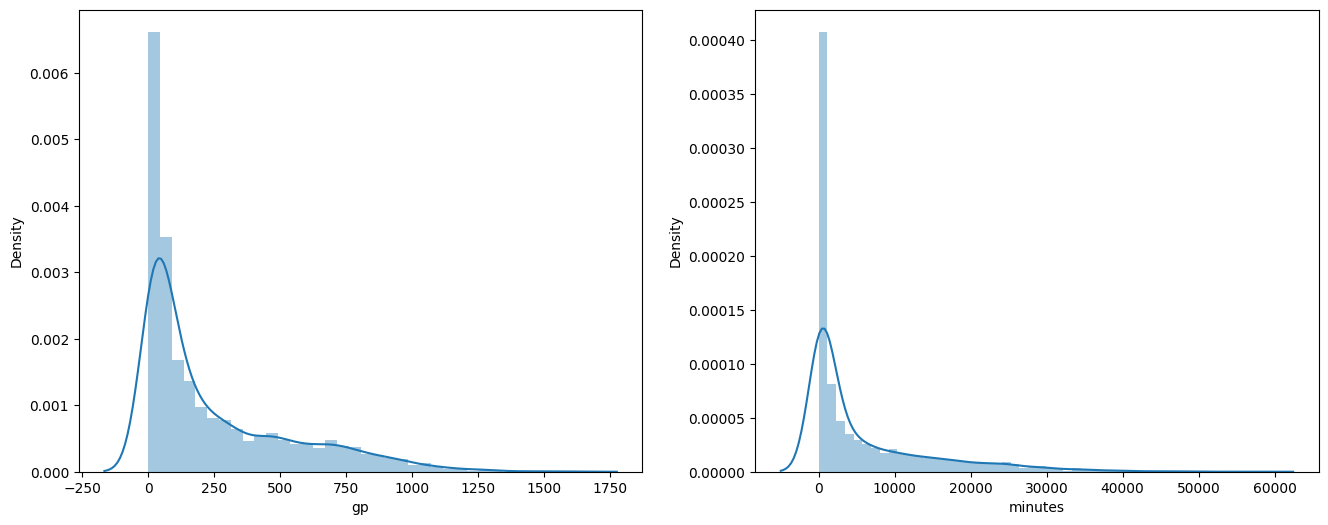

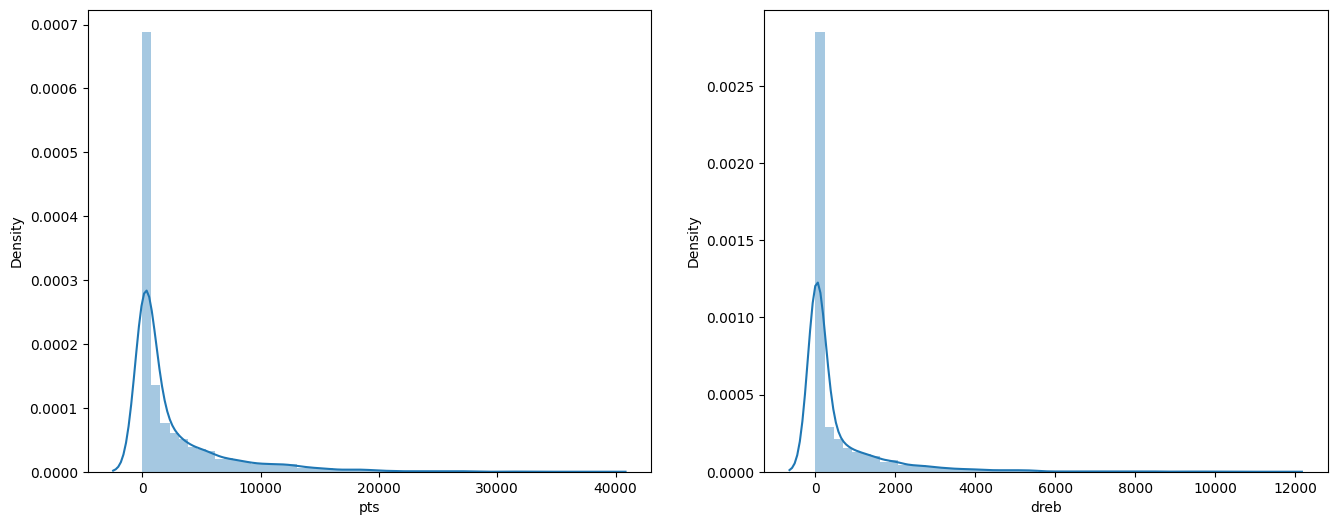

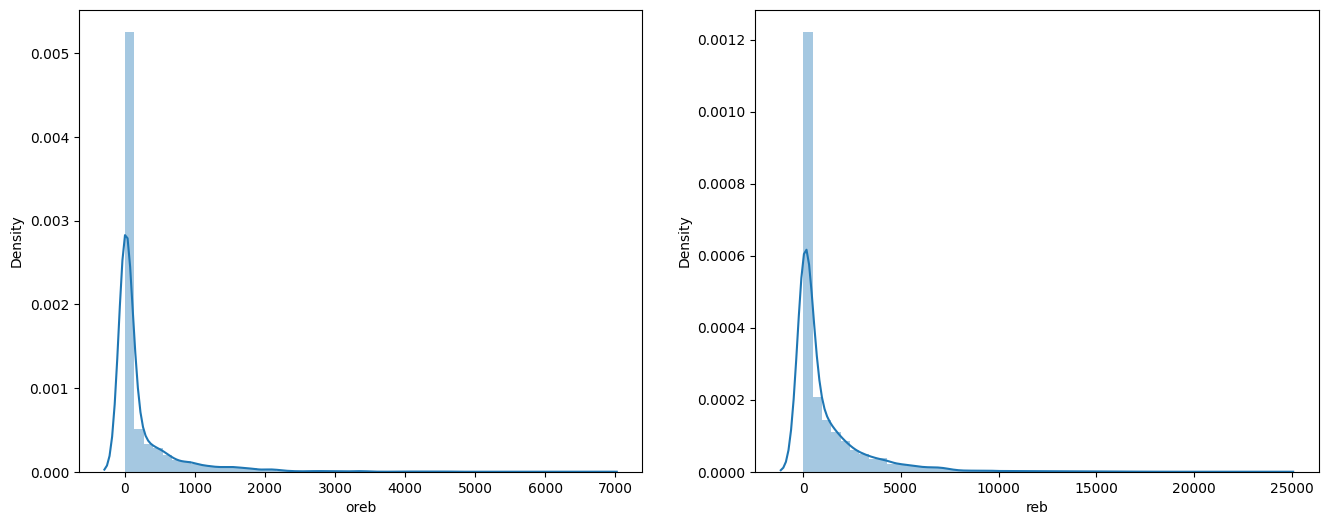

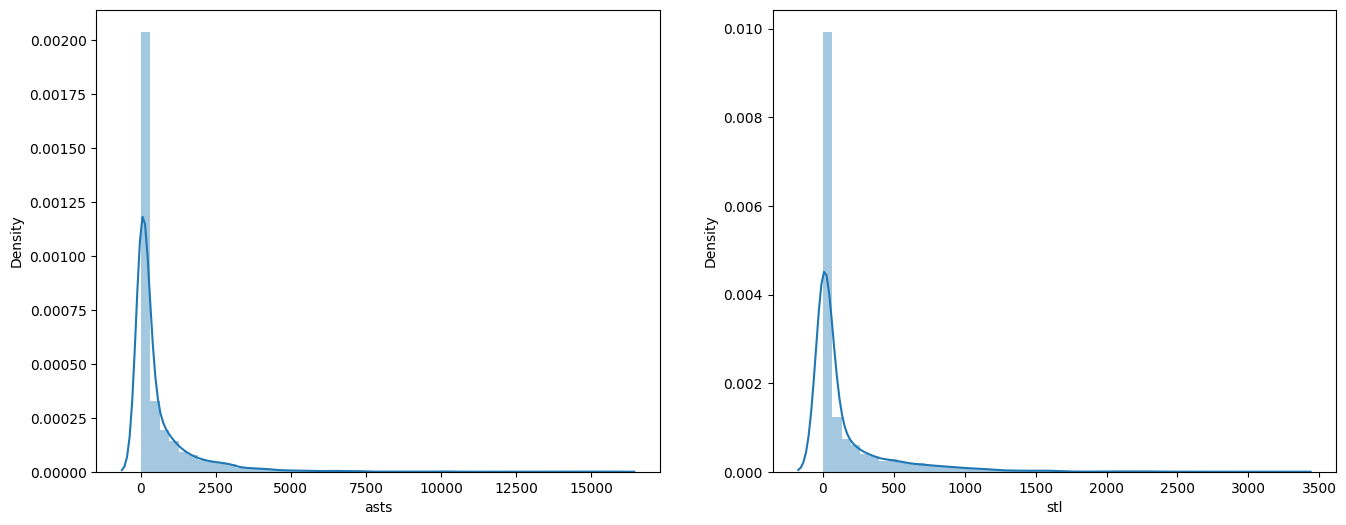

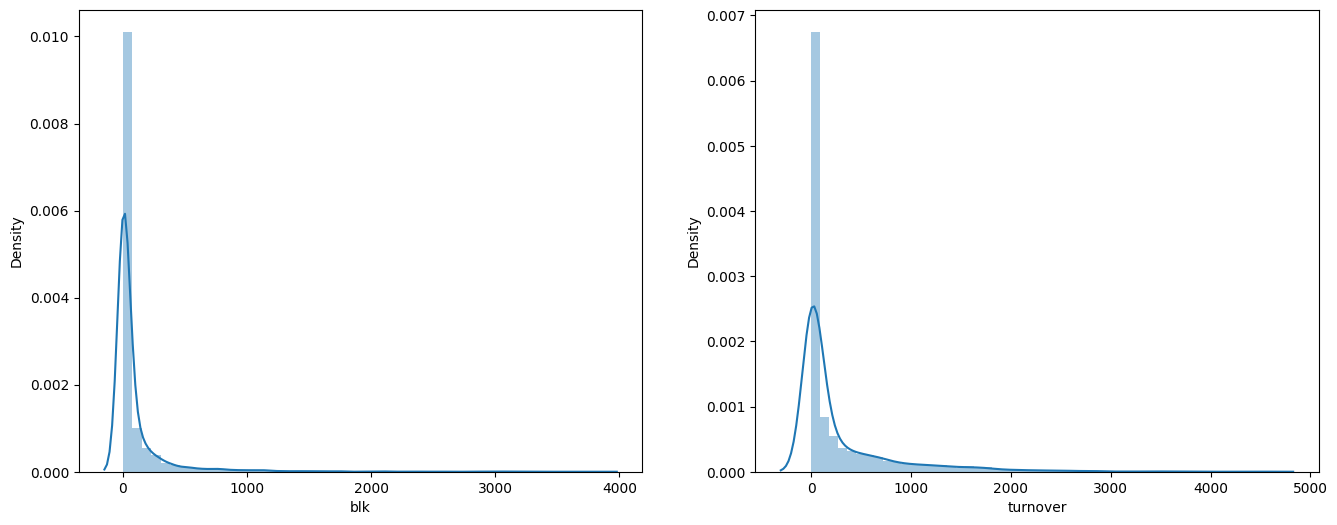

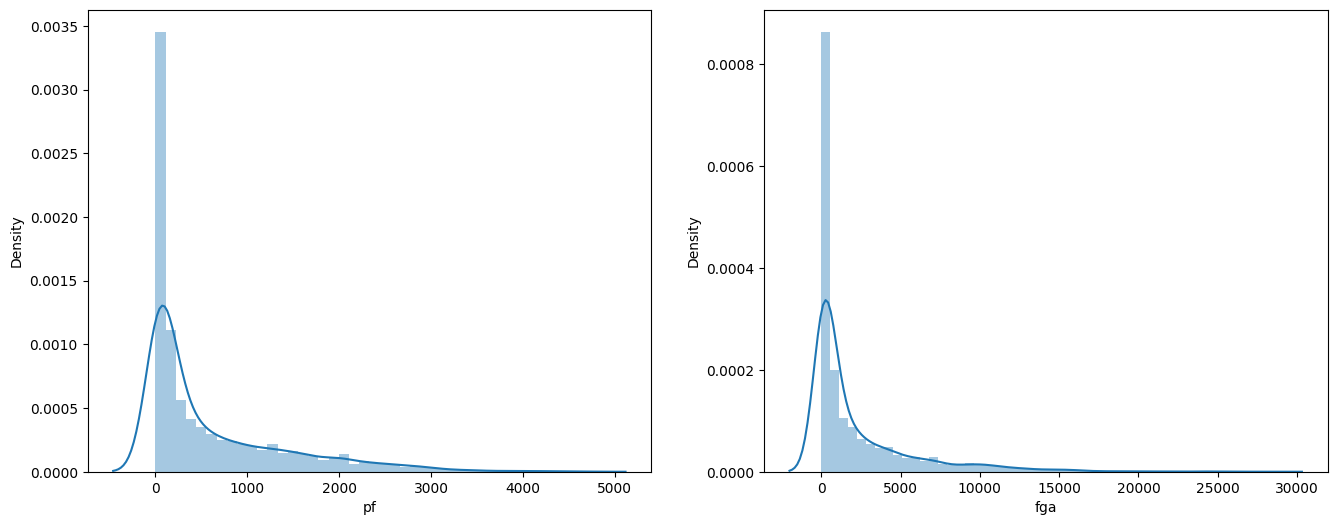

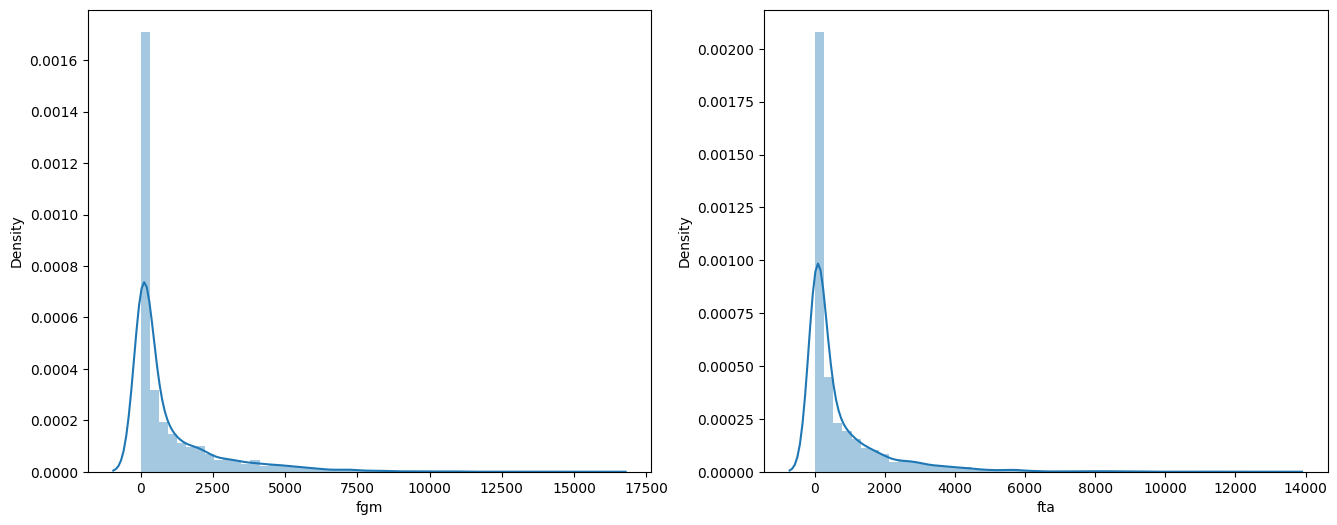

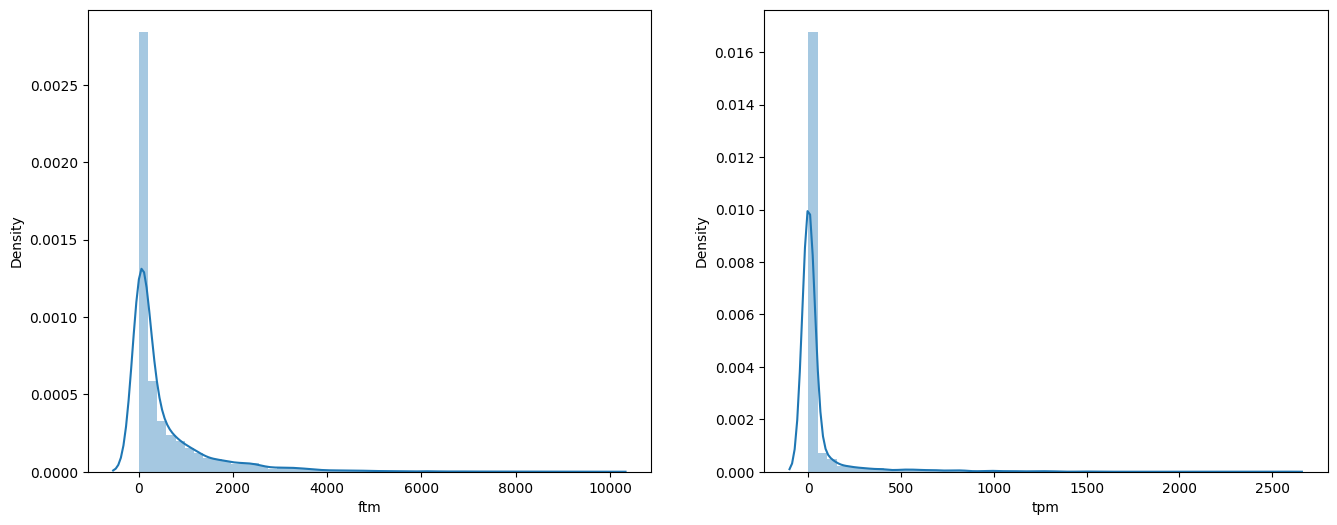

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
lst = [['gp','minutes'],['pts','dreb'],['oreb','reb'],['asts','stl'],['blk','turnover'],['pf','fga'],['fgm','fta'],['ftm','tpm']]
for i in lst:
  df[i[0]]=df[i[0]].astype(int)
  df[i[1]]=df[i[1]].astype(int)
  plt.figure(figsize=(16,6))
  plt.subplot(1,2,1)
  sns.distplot(df[i[0]])
  plt.subplot(1,2,2)
  sns.distplot(df[i[1]])

#**Ensamble Univariate Player Outlier Detection**

In [ ]:
highest =[]
lowest =[]
Metrics = ['gp','minutes','pts','dreb','oreb','reb','asts','stl','blk','turnover','pf','fga','fgm','fta','ftm','tpm']
for i in Metrics:
  highest.append(df[i].mean() + 3*df[i].std())
  lowest.append(df[i].mean() - 1*df[i].std())

#gp = df[(df['gp'] > highest[1])]
gp = []
minutes=[]
pts=[]
dreb=[]
oreb=[]
reb=[]
asts=[]
stl=[]
blk=[]
turnover=[]
pf=[]
fga=[]
fgm=[]
fta=[]
ftm=[]
tpm=[]

NoMetrics = len(Metrics)
OutstandingPlayers=[gp,minutes,pts,dreb,oreb,reb,asts,stl,blk,turnover,pf,fga,fgm,fta,ftm,tpm]
for i in range(NoMetrics):
  OutstandingPlayers[i].append(df[(df[Metrics[i]] > highest[i])])
  #OutstandingPlayers[i].append(df[(df[Metrics[i]] < lowest[i])])

Players = df['ilkid']#.values.tolist()
score=[]
for i in range(len(Players)):
  score.append(0)

Players = df['ilkid'].values.tolist(),score,df['firstname'],df['lastname']

def adder(mylist):
  for i in mylist[0]['ilkid']:
    for ic in range(len(Players[0])):
      if i== Players[0][ic]:
        Players[1][ic]=Players[1][ic]+1

adder(gp)
adder(minutes)
adder(pts)
adder(dreb)
adder(oreb)
adder(reb)
adder(asts)
adder(stl)
adder(blk)
adder(turnover)
adder(pf)
adder(fga)
adder(fta)
adder(ftm)
adder(tpm)

for i in range(len(Players[0])):
  if Players[1][i]>8:
    print(Players[0][i],' ',Players[2][i],' ',Players[3][i])

ABDULKA01   Kareem   Abdul-jabbar
BARKLCH01   Charles   Barkley
BIRDLA01   Larry   Bird
CHAMBTO01   Tom   Chambers
CUMMITE01   Terry   Cummings
DIVACVL01   Vlade   Divac
DREXLCL01   Clyde   Drexler
ENGLIAL01   Alex   English
EWINGPA01   Patrick   Ewing
GILMOAR01   Artis   Gilmore
GILMOAR01   Artis   Gilmore
HAVLIJO01   John   Havlicek
HAYESEL01   Elvin   Hayes
JOHNSDE01   Dennis   Johnson
JORDAMI01   Michael   Jordan
KEMPSH01   Shawn   Kemp
LANIEBO01   Bob   Lanier
MALONKA01   Karl   Malone
MALONMO01   Moses   Malone
MALONMO01   Moses   Malone
MILLERE01   Reggie   Miller
OLAJUHA01   Hakeem   Olajuwon
ONEASH01   Shaquille   O'neal
PARISRO01   Robert   Parish
PERKISA01   Sam   Perkins
PIPPESC01   Scottie   Pippen
ROBINCL02   Clifford   Robinson
ROBINDA01   David   Robinson
SCHREDE01   Detlef   Schrempf
SIKMAJA01   Jack   Sikma
STOCKJO01   John   Stockton
THEUSRE01   Reggie   Theus
THORPOT01   Otis   Thorpe
WILKIDO01   Dominique   Wilkins
WILLIBU01   Buck   Williams
WILLIKE01   Kevin   Wi

#**MultiVariate Outlier Detection**

In [ ]:
df1=df

In [ ]:
df=df1

In [ ]:
df = df[['gp','minutes','pts','dreb','oreb','reb','asts','stl','blk','turnover','pf','fga','fgm','fta','ftm','tpm']]
df = df.dropna()
df = df.to_numpy()
df

array([[  256,  3200,  1465, ...,   321,   225,     0],
       [ 1560, 57446, 38387, ...,  9304,  6712,     1],
       [  586, 15633,  8553, ...,  1161,  1051,   474],
       ...,
       [    7,    30,     2, ...,     0,     0,     0],
       [   53,   398,   118, ...,    36,    20,     0],
       [   56,     0,   273, ...,   109,    77,     0]])

In [ ]:
# Covariance matrix
covariance  = np.cov(df , rowvar=False)

# Covariance matrix power of -1
covariance_pm1 = np.linalg.matrix_power(covariance, -1)

# Center point
centerpoint = np.mean(df , axis=0)


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2
from matplotlib import patches
import matplotlib.pyplot as plt
distances = []
for i, val in enumerate(df):
      p1 = val
      p2 = centerpoint
      distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
      distances.append(distance)
distances = np.array(distances)

# Cutoff (threshold) value from Chi-Sqaure Distribution for detecting outliers
print(df.shape[1])
cutoff = chi2.ppf(0.999999999, df.shape[1])
cutoff = cutoff*3
print(cutoff)
# Index of outliers
outlierIndexes = np.where(distances > cutoff)


#print('--- Index of Outliers ----')
#print(outlierIndexes)

#print('--- Observations found as outlier -----')
#print(df[ distances > cutoff , :])

16
226.96255373252956


In [ ]:
myout = np.where(distances > np.mean(distances)+3*np.std(distances))
intd = myout[0].tolist()

df4=df1
df4=df4.values.tolist()
for i in intd:
  print(df4[i][0],' ',df4[i][1],' ',df4[i][2])

ABDULKA01   Kareem   Abdul-jabbar
BELLAWA01   Walt   Bellamy
CHAMBWI01   Wilt   Chamberlain
EATONMA01   Mark   Eaton
ENGLIAL01   Alex   English
JOHNSMA01   Magic   Johnson
JORDAMI01   Michael   Jordan
MALONKA01   Karl   Malone
MALONMO01   Moses   Malone
MILLERE01   Reggie   Miller
OLAJUHA01   Hakeem   Olajuwon
ONEASH01   Shaquille   O'neal
ROBEROS01   Oscar   Robertson
ROBINDA01   David   Robinson
RODMADE01   Dennis   Rodman
RUSSEBI01   Bill   Russell
SCHAYDO01   Dolph   Schayes
STOCKJO01   John   Stockton
WILLISC01   Scott   Williams


In [ ]:
ind = outlierIndexes[0].tolist()
print(len(ind))
df4=df1
df4=df4.values.tolist()
for i in ind:
  print(df4[i][0],' ',df4[i][1],' ',df4[i][2])

24
ABDULKA01   Kareem   Abdul-jabbar
BARKLCH01   Charles   Barkley
BELLAWA01   Walt   Bellamy
BIRDLA01   Larry   Bird
CHAMBWI01   Wilt   Chamberlain
EATONMA01   Mark   Eaton
ENGLIAL01   Alex   English
JACKSMA01   Mark   Jackson
JOHNSMA01   Magic   Johnson
JORDAMI01   Michael   Jordan
LUCASJE01   Jerry   Lucas
MALONKA01   Karl   Malone
MALONMO01   Moses   Malone
MILLERE01   Reggie   Miller
MUTOMDI01   Dikembe   Mutombo
OLAJUHA01   Hakeem   Olajuwon
ONEASH01   Shaquille   O'neal
ROBEROS01   Oscar   Robertson
ROBINDA01   David   Robinson
RODMADE01   Dennis   Rodman
RUSSEBI01   Bill   Russell
SCHAYDO01   Dolph   Schayes
STOCKJO01   John   Stockton
WILLISC01   Scott   Williams


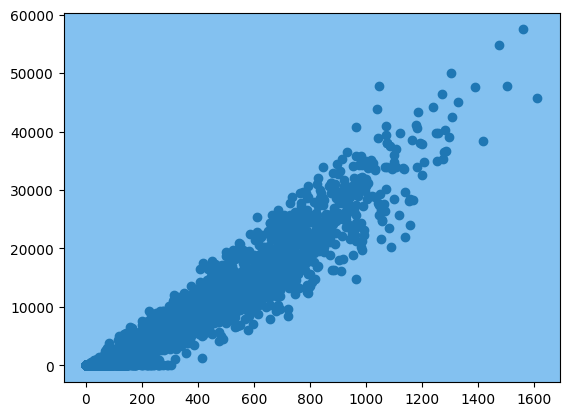

In [ ]:
pearson = covariance[0, 1]/np.sqrt(covariance[0, 0] * covariance[1, 1])
ell_radius_x = np.sqrt(1 + pearson)
ell_radius_y = np.sqrt(1 - pearson)
lambda_, v = np.linalg.eig(covariance)
lambda_ = np.sqrt(lambda_)

# Ellipse patch
ellipse = patches.Ellipse(xy=(centerpoint[0], centerpoint[1]),
                  width=lambda_[0]*np.sqrt(cutoff)*2, height=lambda_[1]*np.sqrt(cutoff)*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor='#fab1a0')
ellipse.set_facecolor('#0984e3')
ellipse.set_alpha(0.5)
fig = plt.figure()
ax = plt.subplot()
ax.add_artist(ellipse)
plt.scatter(df[: , 0], df[ : , 1])
plt.show()

#Teams


In [ ]:
import numpy as np
import pandas as pd

from sklearn import svm
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler

from sklearn import datasets
from sklearn import preprocessing

import pandas as pd

import dask.dataframe as dd
np.random.seed(42)

In [ ]:
import pandas as pd
import os
from pathlib import Path
df = pd.DataFrame()

import base64
import requests

master = "https://raw.githubusercontent.com/valixkaldor/Comp721Project/main/teams.txt"
req = requests.get(master)
req = req.text
teamsdf = pd.read_csv(master)

teamsdf

,team,location,name,leag
0,ANA,Anaheim,Amigos,A
1,AND,Anderson,Duffey Packers,N
2,ATL,Atlanta,Hawks,N
3,BA1,Baltimore,Bullets,N
4,BAL,Baltimore,Bullets,N
...,...,...,...,...
91,WA1,Washington,Bullets,N
92,WAC,Washington,Caps,A
93,WAS,Washington,Wizards,N
94,WAT,Waterloo,Hawks,N


In [ ]:
#Getting dictionary of all team tags

teamslist = []

for j,rows in teamsdf.iterrows():
    teamslist.append(rows['team'])

print(teamslist)

['ANA', 'AND', 'ATL', 'BA1', 'BAL', 'BOS', 'BUF', 'CAP', 'CAR', 'CH1', 'CH2', 'CHA', 'CHI', 'CHR', 'CIN', 'CL1', 'CLE', 'DAL', 'DE1', 'DEN', 'DEN', 'DET', 'DLC', 'DN1', 'FLA', 'FTW', 'GSW', 'HMV', 'HOU', 'IND', 'IND', 'INI', 'INJ', 'KCK', 'KEN', 'LAC', 'LAL', 'LAS', 'MEM', 'MFL', 'MI1', 'MIA', 'MIE', 'MIL', 'MIN', 'MMP', 'MMS', 'MMT', 'MNM', 'MNP', 'NJA', 'NJN', 'NOB', 'NOH', 'NOJ', 'NYK', 'NYN', 'NYN', 'OAK', 'ORL', 'PH1', 'PHI', 'PHO', 'PIT', 'POR', 'PRO', 'PTC', 'PTP', 'ROC', 'SAC', 'SAS', 'SAS', 'SDC', 'SDQ', 'SDR', 'SDS', 'SEA', 'SFW', 'SHE', 'ST1', 'STL', 'STL', 'SYR', 'TEX', 'TO1', 'TOR', 'TRI', 'UTA', 'UTS', 'VAN', 'VIR', 'WA1', 'WAC', 'WAS', 'WAT', 'WSC']


In [ ]:
# WIN/LOSS RATIO
# Were first going to look at the #wins vs #losses for the past season

df = pd.read_csv("https://raw.githubusercontent.com/valixkaldor/Comp721Project/main/team_season.txt")
df.head()

,team,year,leag,o_fgm,o_fga,o_ftm,o_fta,o_oreb,o_dreb,o_reb,...,d_pf,d_stl,d_to,d_blk,d_3pm,d_3pa,d_pts,pace,won,lost
0,BOS,1946,N,1397,5133,811,1375,0,0,0,...,0,0,0,0,0,0,3900,0.0,22,38
1,CH1,1946,N,1879,6309,939,1550,0,0,0,...,0,0,0,0,0,0,4471,0.0,39,22
2,CL1,1946,N,1674,5699,903,1428,0,0,0,...,0,0,0,0,0,0,4308,0.0,30,30
3,DE1,1946,N,1437,5843,923,1494,0,0,0,...,0,0,0,0,0,0,3918,0.0,20,40
4,NYK,1946,N,1465,5255,951,1438,0,0,0,...,0,0,0,0,0,0,3840,0.0,33,27


In [ ]:
#filtering only from the previous year

rslt_df = df.loc[df['year'] > 2002]
rslt_df.head()

,team,year,leag,o_fgm,o_fga,o_ftm,o_fta,o_oreb,o_dreb,o_reb,...,d_pf,d_stl,d_to,d_blk,d_3pm,d_3pa,d_pts,pace,won,lost
1128,ATL,2003,N,2829,6529,1534,1976,997,2506,3503,...,1699,731,1086,409,482,1345,7992,92.800003,28,54
1129,BOS,2003,N,2843,6415,1572,2095,851,2440,3291,...,1819,719,1334,407,555,1534,7930,94.300003,36,46
1130,CHI,2003,N,2798,6753,1330,1834,1048,2519,3567,...,1684,694,1190,442,439,1236,7876,93.800003,23,59
1131,CLE,2003,N,2922,6753,1528,2030,1118,2619,3737,...,1655,635,1018,434,431,1162,7834,92.900002,35,47
1132,DAL,2003,N,3322,7230,1475,1854,1174,2538,3712,...,1689,582,1178,382,534,1471,8262,94.800003,52,30


In [ ]:
#calculating win/loss for each team

dic = {}

for i in teamslist:
    dic[i] = [0.0,0.0]

for j,rows in rslt_df.iterrows():
    if rows['team'] not in dic.keys():
        dic[rows['team']] = [int(rows['won']), int(rows['lost'])]
    else:
        dic[rows['team']][0] += int(rows['won'])
        dic[rows['team']][1] += int(rows['lost'])

w_l_dict = {}

for i in dic.keys():
    w_l_dict[i] = dic[i][0]/(dic[i][1]+1)

w_l_list = sorted(w_l_dict.items(),key=lambda x:x[1])
print(w_l_list)
sortdict = dict(w_l_list)
print(sortdict)

[('ANA', 0.0), ('AND', 0.0), ('BA1', 0.0), ('BAL', 0.0), ('BUF', 0.0), ('CAP', 0.0), ('CAR', 0.0), ('CH1', 0.0), ('CH2', 0.0), ('CHA', 0.0), ('CIN', 0.0), ('CL1', 0.0), ('DE1', 0.0), ('DLC', 0.0), ('DN1', 0.0), ('FLA', 0.0), ('FTW', 0.0), ('HMV', 0.0), ('INI', 0.0), ('INJ', 0.0), ('KCK', 0.0), ('KEN', 0.0), ('LAS', 0.0), ('MFL', 0.0), ('MI1', 0.0), ('MIE', 0.0), ('MMP', 0.0), ('MMS', 0.0), ('MMT', 0.0), ('MNM', 0.0), ('MNP', 0.0), ('NJA', 0.0), ('NOB', 0.0), ('NOJ', 0.0), ('NYN', 0.0), ('OAK', 0.0), ('PH1', 0.0), ('PIT', 0.0), ('PRO', 0.0), ('PTC', 0.0), ('PTP', 0.0), ('ROC', 0.0), ('SDC', 0.0), ('SDQ', 0.0), ('SDR', 0.0), ('SDS', 0.0), ('SFW', 0.0), ('SHE', 0.0), ('ST1', 0.0), ('STL', 0.0), ('SYR', 0.0), ('TEX', 0.0), ('TO1', 0.0), ('TRI', 0.0), ('UTS', 0.0), ('VAN', 0.0), ('VIR', 0.0), ('WA1', 0.0), ('WAC', 0.0), ('WAT', 0.0), ('WSC', 0.0), ('CHR', 0.27692307692307694), ('ATL', 0.33064516129032256), ('ORL', 0.5277777777777778), ('NOH', 0.5566037735849056), ('LAC', 0.65), ('TOR', 0.66

In [ ]:
# coach career-wide win/loss

dfcoach = pd.read_csv("https://raw.githubusercontent.com/valixkaldor/Comp721Project/main/coaches_season.txt")
dfcoach.head()

,coachid,year,yr_order,firstname,lastname,season_win,season_loss,playoff_win,playoff_loss,team
0,RUSSEJO01,1946,1,John,Russell,22,38,0,0,BOS
1,OLSENHA01,1946,1,Harold,Olsen,39,22,5,6,CH1
2,DEHNEDU01,1946,1,Dutch,Dehnert,17,20,0,0,CL1
3,CLIFFRO01,1946,2,Roy,Clifford,13,10,1,2,CL1
4,CURTIGL01,1946,1,Glenn,Curtis,12,22,0,0,DE1


In [ ]:
#current (2004-05) coaches in NBA

curr_coaches = dfcoach
curr_coaches.head()

,coachid,year,yr_order,firstname,lastname,season_win,season_loss,playoff_win,playoff_loss,team
0,RUSSEJO01,1946,1,John,Russell,22,38,0,0,BOS
1,OLSENHA01,1946,1,Harold,Olsen,39,22,5,6,CH1
2,DEHNEDU01,1946,1,Dutch,Dehnert,17,20,0,0,CL1
3,CLIFFRO01,1946,2,Roy,Clifford,13,10,1,2,CL1
4,CURTIGL01,1946,1,Glenn,Curtis,12,22,0,0,DE1


In [ ]:
# dictionaary of clubs with the value being the current coach

coach_dic = {}
for j,rows in curr_coaches.iterrows():
    coach_dic[rows['team']] = rows['coachid']

print(coach_dic)

{'BOS': 'CARROJO01 ', 'CH1': 'BROWNPH01 ', 'CL1': 'CLIFFRO01 ', 'DE1': 'SACHSPH01 ', 'NYK': 'WILKELE01 ', 'PH1': 'MCGUIFR01 ', 'PIT': 'BIRCHPA01 ', 'PRO': 'LOEFFKE01 ', 'ST1': 'LEWISGR01 ', 'TO1': 'ROLFERO01 ', 'WSC': 'MCKINHO01 ', 'BA1': 'BEECL01   ', 'DET': 'BROWNLA01 ', 'INJ': 'FRIDDBU01 ', 'MIE': 'POLLAJI01 ', 'ROC': 'WANZEBO01 ', 'AND': 'MOOREDO01 ', 'DN1': 'DARDEJI01 ', 'INI': 'SCHAEHE01 ', 'SHE': 'SUESEKE01 ', 'SYR': 'HANNUAL01 ', 'TRI': 'MCMILDA01 ', 'WAT': 'SMILEJA01 ', 'MI1': 'HOLZMRE01 ', 'FTW': 'ECKMACH01 ', 'STL': 'GUERIRI01 ', 'CIN': 'COUSYBO01 ', 'LAL': 'JACKSPH01 ', 'CH2': 'LEONABO01 ', 'SFW': 'ATTLEAL01 ', 'BAL': 'SHUEGE01  ', 'PHI': 'FORDCH01  ', 'CHI': 'SKILESC01 ', 'SDR': 'WINTETE01 ', 'SEA': 'MCMILNA01 ', 'ATL': 'STOTTTE01 ', 'MIL': 'PORTETE01 ', 'PHO': 'DANTOMI01 ', 'BUF': 'FITZSCO01 ', 'CLE': 'SILASPA01 ', 'POR': 'CHEEKMA01 ', 'GSW': 'MUSSEER01 ', 'HOU': 'VANGUJE01 ', 'KCK': 'JOHNSPH01 ', 'CAP': 'JONESKC01 ', 'NOJ': 'BAYLOEL01 ', 'WA1': 'BICKEBE01 ', 'DEN': 'BZDE

In [ ]:
#load in coach history

dfcoach_history = pd.read_csv("https://raw.githubusercontent.com/valixkaldor/Comp721Project/main/coaches_career.txt")
dfcoach_history.head()

,coachid,firstname,lastname,season_win,season_loss,playoff_win,playoff_loss
0,ADELMRI01,Rick,Adelman,658,411,67,60
1,ADUBARI01,Richie,Adubato,127,240,3,5
2,AINGEDA01,Danny,Ainge,136,90,3,9
3,ALBECST01,Stan,Albeck,307,267,18,26
4,ARMSTPA01,Paul,Armstrong,22,32,0,0


In [ ]:
# calculate career win/loss for each coach

careerdic = {}
for j,rows in dfcoach_history.iterrows():
    careerdic[rows['coachid']] = (float(rows['season_win'])+float(rows['playoff_win']))/(float(rows['season_loss'])+float(rows['playoff_loss'])+1)

print(careerdic)

{'ADELMRI01 ': 1.5360169491525424, 'ADUBARI01 ': 0.5284552845528455, 'AINGEDA01 ': 1.39, 'ALBECST01 ': 1.1054421768707483, 'ARMSTPA01 ': 0.6666666666666666, 'ATTLEAL01 ': 1.0710382513661203, 'AUERBRE01 ': 1.8888888888888888, 'AYERSRA01 ': 0.65625, 'BACHJO01  ': 0.5491329479768786, 'BADGEED01 ': 1.0240963855421688, 'BARKECL01 ': 1.0819672131147542, 'BASSBO01  ': 1.0701754385964912, 'BAYLOEL01 ': 0.6323529411764706, 'BEARDBU01 ': 0.5714285714285714, 'BENNECA01 ': 0.0, 'BERRYBI01 ': 0.0, 'BERTKBI01 ': 1.0, 'BIANCAL01 ': 0.4732142857142857, 'BICKEBE01 ': 0.953551912568306, 'BIRCHPA01 ': 0.7848101265822784, 'BIRDLA01  ': 2.034090909090909, 'BLAIRBI01 ': 0.35365853658536583, 'BORYLVI01 ': 0.9302325581395349, 'BRAUNCA01 ': 0.45454545454545453, 'BRISTAL01 ': 1.0, 'BROVEJI01 ': 0.35714285714285715, 'BROWNHE01 ': 0.9390243902439024, 'BROWNHU01 ': 0.8440545808966862, 'BROWNLA01 ': 1.2837326607818411, 'BROWNPH01 ': 1.5151515151515151, 'BUCKNQU01 ': 0.18571428571428572, 'BUCKWBU01 ': 0.52, 'BUTCHDO

In [ ]:
# associate each team with it's current coaches w/l ratio

coach_ranking = {}
for i in coach_dic.keys():
    if coach_dic[i] in careerdic:
        coach_ranking[i] = careerdic[coach_dic[i]]
    else:
        coach_ranking[i] = 0.0

print(coach_ranking)

{'BOS': 0.5185185185185185, 'CH1': 1.5151515151515151, 'CL1': 1.0769230769230769, 'DE1': 0.42105263157894735, 'NYK': 1.1341463414634145, 'PH1': 1.4473684210526316, 'PIT': 0.7848101265822784, 'PRO': 0.8556701030927835, 'ST1': 0.7236842105263158, 'TO1': 0.6071428571428571, 'WSC': 0.38461538461538464, 'BA1': 0.0, 'DET': 1.2837326607818411, 'INJ': 0.4666666666666667, 'MIE': 0.40217391304347827, 'ROC': 0.7050359712230215, 'AND': 0.5538461538461539, 'DN1': 0.21153846153846154, 'INI': 0.775, 'SHE': 0.5348837209302325, 'SYR': 1.1753086419753087, 'TRI': 0.6, 'WAT': 0.6470588235294118, 'MI1': 1.156441717791411, 'FTW': 1.0075757575757576, 'STL': 1.0828220858895705, 'CIN': 0.6714285714285714, 'LAL': 2.6088082901554404, 'CH2': 0.7018867924528301, 'SFW': 1.0710382513661203, 'BAL': 0.8954895489548955, 'PHI': 0.8549618320610687, 'CHI': 1.037037037037037, 'SDR': 0.7520661157024794, 'SEA': 1.0318471337579618, 'ATL': 0.6046511627906976, 'MIL': 0.9130434782608695, 'PHO': 0.45454545454545453, 'BUF': 1.0509

In [ ]:
#avg player rating
#load in player statistics

dfplayer = pd.read_csv("https://raw.githubusercontent.com/valixkaldor/Comp721Project/main/player_regular_season.txt")
dfplayer.head()

,ilkid,year,firstname,lastname,team,leag,gp,minutes,pts,oreb,...,stl,blk,turnover,pf,fga,fgm,fta,ftm,tpa,tpm
0,ABRAMJO01,1946,John,Abramovic,PIT,N,47,0,527,0,...,0,0,0.0,161,834,202,178,123,0,0
1,AUBUCCH01,1946,Chet,Aubuchon,DE1,N,30,0,65,0,...,0,0,0.0,46,91,23,35,19,0,0
2,BAKERNO01,1946,Norm,Baker,CH1,N,4,0,0,0,...,0,0,0.0,0,1,0,0,0,0,0
3,BALTIHE01,1946,Herschel,Baltimore,ST1,N,58,0,138,0,...,0,0,0.0,98,263,53,69,32,0,0
4,BARRJO01,1946,John,Barr,ST1,N,58,0,295,0,...,0,0,0.0,164,438,124,79,47,0,0


In [ ]:
#load in 2004-05 nba players

curr_players = dfplayer.loc[dfplayer['year'] == 2004]
curr_players.head()

,ilkid,year,firstname,lastname,team,leag,gp,minutes,pts,oreb,...,stl,blk,turnover,pf,fga,fgm,fta,ftm,tpa,tpm
18527,ABDURSH01,2004,Shareef,Abdur-Rahim,POR,N,54,1868,909,123,...,49,26,117.0,150,670,337,254,220,39,15
18528,ALEXACO01,2004,Cory,Alexander,CHR,N,16,201,49,8,...,9,1,19.0,29,49,16,12,9,19,8
18529,ALLENMA01,2004,Malik,Allen,CHR,N,22,271,111,16,...,5,11,7.0,24,101,49,14,13,0,0
18530,ALLENMA01,2004,Malik,Allen,MIA,N,14,248,83,24,...,4,11,11.0,29,76,35,14,13,0,0
18531,ALLENMA01,2004,Malik,Allen,TOT,N,36,519,194,40,...,9,22,18.0,53,177,84,28,26,0,0


In [ ]:
#associate each team with a list of its players

playerdic = {}

for i in sortdict.keys():
    playerdic[i] = []

for j,rows in curr_players.iterrows():
    if rows['team'] != 'TOT':
        playerdic[rows['team']].append(rows['ilkid'])

print(playerdic)

{'ANA': [], 'AND': [], 'BA1': [], 'BAL': [], 'BUF': [], 'CAP': [], 'CAR': [], 'CH1': [], 'CH2': [], 'CHA': [], 'CIN': [], 'CL1': [], 'DE1': [], 'DLC': [], 'DN1': [], 'FLA': [], 'FTW': [], 'HMV': [], 'INI': [], 'INJ': [], 'KCK': [], 'KEN': [], 'LAS': [], 'MFL': [], 'MI1': [], 'MIE': [], 'MMP': [], 'MMS': [], 'MMT': [], 'MNM': [], 'MNP': [], 'NJA': [], 'NOB': [], 'NOJ': [], 'NYN': [], 'OAK': [], 'PH1': [], 'PIT': [], 'PRO': [], 'PTC': [], 'PTP': [], 'ROC': [], 'SDC': [], 'SDQ': [], 'SDR': [], 'SDS': [], 'SFW': [], 'SHE': [], 'ST1': [], 'STL': [], 'SYR': [], 'TEX': [], 'TO1': [], 'TRI': [], 'UTS': [], 'VAN': [], 'VIR': [], 'WA1': [], 'WAC': [], 'WAT': [], 'WSC': [], 'CHR': ['ALEXACO01', 'ALLENMA01', 'BOGANKE01', 'BREZEPR01', 'CARROMA01', 'ELYME01', 'HARTJA01', 'HOUSEED01', 'KAPONJA01', 'KNIGHBR01', 'OKAFOEM01', 'ROBINBE01', 'RUSHKA01', 'SAMPSJA01', 'SLAYTA01', 'SMITHST01', 'SMITHTH01', 'WALLAGE01', 'WHITEJA01'], 'ATL': ['ANDERKE02', 'BARRYJO01', 'CHILDJO01', 'COLLIJA02', 'DELKTO01', 'DIAW

In [ ]:
#load in player career statistics

dfplayer_history = pd.read_csv("https://raw.githubusercontent.com/valixkaldor/Comp721Project/main/player_regular_season.txt")
dfplayer_history.head()

,ilkid,year,firstname,lastname,team,leag,gp,minutes,pts,oreb,...,stl,blk,turnover,pf,fga,fgm,fta,ftm,tpa,tpm
0,ABRAMJO01,1946,John,Abramovic,PIT,N,47,0,527,0,...,0,0,0.0,161,834,202,178,123,0,0
1,AUBUCCH01,1946,Chet,Aubuchon,DE1,N,30,0,65,0,...,0,0,0.0,46,91,23,35,19,0,0
2,BAKERNO01,1946,Norm,Baker,CH1,N,4,0,0,0,...,0,0,0.0,0,1,0,0,0,0,0
3,BALTIHE01,1946,Herschel,Baltimore,ST1,N,58,0,138,0,...,0,0,0.0,98,263,53,69,32,0,0
4,BARRJO01,1946,John,Barr,ST1,N,58,0,295,0,...,0,0,0.0,164,438,124,79,47,0,0


In [ ]:
# take their form in the last 3 years

playerform = dfplayer_history.loc[dfplayer['year'] > 2000]
playerform.head()

,ilkid,year,firstname,lastname,team,leag,gp,minutes,pts,oreb,...,stl,blk,turnover,pf,fga,fgm,fta,ftm,tpa,tpm
17019,ABDULTA01,2001,Tariq,Abdul-wahad,DAL,N,24,442,135,41,...,20,10,27.0,56,147,55,33,24,2,1
17020,ABDURSH01,2001,Shareef,Abdur-rahim,ATL,N,77,2980,1636,198,...,98,81,250.0,214,1297,598,523,419,70,21
17021,ALEXACO02,2001,Courtney,Alexander,WAS,N,56,1327,549,43,...,35,7,60.0,113,474,223,121,98,18,5
17022,ALEXAVI01,2001,Victor,Alexander,DET,N,15,98,40,7,...,0,1,5.0,6,51,18,8,4,2,0
17023,ALLENMA01,2001,Malik,Allen,MIA,N,12,161,52,15,...,3,8,2.0,16,51,22,10,8,1,0


In [ ]:
#aggregate their statistics
#pts, turnovers, and rebounds are the most important statistics in basketball
#number of minutes also recorded to measure their efficiency

aggregations = {
    'pts':'sum',
    'turnover':'sum',
    'reb':'sum',
    'minutes':'sum',
}

df_player_stats = playerform.groupby('ilkid',as_index=False).agg(aggregations)

df_player_stats.head()

,ilkid,pts,turnover,reb,minutes
0,ABDULTA01,192,34.0,124,646
1,ABDURSH01,6921,947.0,3043,13305
2,ALEXACO01,49,19.0,29,201
3,ALEXACO02,1072,128.0,266,2687
4,ALEXAVI01,40,5.0,29,98


In [ ]:
#create a dictionary of each current player with their statistics

dict_player_stats = {}

for j,rows in df_player_stats.iterrows():
    dict_player_stats[rows['ilkid']] = [0,0,0,1]

for j,rows in df_player_stats.iterrows():
    dict_player_stats[rows['ilkid']] = [0,0,0,1]


for j,rows in df_player_stats.iterrows():
    dict_player_stats[rows['ilkid']] = [float(rows['pts'])
                                        , float(rows['turnover'])
                                        , float(rows['reb'])
                                        , float(rows['minutes'])]

print(dict_player_stats)

{'ABDULTA01': [192.0, 34.0, 124.0, 646.0], 'ABDURSH01': [6921.0, 947.0, 3043.0, 13305.0], 'ALEXACO01': [49.0, 19.0, 29.0, 201.0], 'ALEXACO02': [1072.0, 128.0, 266.0, 2687.0], 'ALEXAVI01': [40.0, 5.0, 29.0, 98.0], 'ALLENMA01': [1398.0, 193.0, 780.0, 4133.0], 'ALLENRA02': [8083.0, 882.0, 1707.0, 13502.0], 'ALLENTO01': [492.0, 77.0, 221.0, 1261.0], 'ALSTORA01': [2517.0, 424.0, 684.0, 6878.0], 'AMAECJO01': [274.0, 89.0, 186.0, 1063.0], 'ANDERCH01': [1133.0, 185.0, 1058.0, 3628.0], 'ANDERDE01': [2940.0, 375.0, 763.0, 7467.0], 'ANDERKE02': [2143.0, 415.0, 796.0, 7093.0], 'ANDERNI01': [60.0, 14.0, 32.0, 219.0], 'ANDERSH01': [2243.0, 429.0, 1107.0, 7646.0], 'ANTHOCA01': [3283.0, 471.0, 924.0, 5603.0], 'ANTHOGR01': [474.0, 94.0, 132.0, 1512.0], 'ARAUJRA01': [196.0, 52.0, 185.0, 736.0], 'ARCHIRO01': [83.0, 27.0, 121.0, 584.0], 'ARENAGI01': [5124.0, 855.0, 1150.0, 9363.0], 'ARIZATR01': [468.0, 73.0, 242.0, 1382.0], 'ARMSTBR01': [239.0, 37.0, 63.0, 699.0], 'ARMSTDA01': [3152.0, 624.0, 1070.0, 9304

In [ ]:
#calculate avg pts/min, turnovers/min, rebounds/min for normalization

total_pts = 0
total_tnv = 0
total_rbs = 0
total_mins = 0

for i in dict_player_stats.keys():
    total_pts+=dict_player_stats[i][0]
    total_tnv+=dict_player_stats[i][1]
    total_rbs+=dict_player_stats[i][2]
    total_mins+=dict_player_stats[i][3]

print(total_pts,total_tnv,total_rbs,total_mins)

avgs = [total_pts/total_mins,total_tnv/total_mins,total_rbs/total_mins]
print(avgs)

979383.0 144932.0 433126.0 2494366.0
[0.3926380491074686, 0.05810374259431054, 0.17364171897788858]


In [ ]:
#normalize and aggregate statistics to get an avg rating for each player

dict_avg_stats = {}

for i in dict_player_stats.keys():
    dict_avg_stats[i] = np.max([(dict_player_stats[i][0]/(dict_player_stats[i][3]+1))/avgs[0]
    ,(dict_player_stats[i][1]/(dict_player_stats[i][3]+1))/avgs[1],(dict_player_stats[i][2]/(dict_player_stats[i][3]+1))/avgs[2]])

print(dict_avg_stats)

sorted_list = sorted(dict_avg_stats.items(),key=lambda x:x[1])
sortplayers = dict(sorted_list)
print(sortplayers)

{'ABDULTA01': 1.1037312221741342, 'ABDURSH01': 1.3247348055700081, 'ALEXACO01': 1.61881837108724, 'ALEXACO02': 1.0157179741395008, 'ALEXAVI01': 1.686975311310955, 'ALLENMA01': 1.0866008836680843, 'ALLENRA02': 1.5245789809836514, 'ALLENTO01': 1.0500917901364137, 'ALSTORA01': 1.0608071540912458, 'AMAECJO01': 1.4396080666504947, 'ANDERCH01': 1.6789765211023464, 'ANDERDE01': 1.0026529546702392, 'ANDERKE02': 1.0068222519270793, 'ANDERNI01': 1.0952197017786396, 'ANDERSH01': 0.9655218241875247, 'ANTHOCA01': 1.4920396793569541, 'ANTHOGR01': 1.0692636876962642, 'ARAUJRA01': 1.4456067387198868, 'ARCHIRO01': 1.1911746097373372, 'ARENAGI01': 1.5714501274223633, 'ARIZATR01': 1.0077182164806107, 'ARMSTBR01': 0.9097028951508294, 'ARMSTDA01': 1.1541549141027994, 'ARROYCA01': 1.3548076913581344, 'ARTESRO01': 1.2061835873651388, 'ATKINCH01': 0.9603928355253429, 'AUGMOST01': 0.8358507595975677, 'AUSTIIS01': 1.3275581575464288, 'AVERYWI01': 1.2625533241684266, 'BAGARDA01': 1.4618343268985132, 'BAKERMA02':

In [ ]:
print(sortplayers['JORDAMI01'])

1.4980155841776486


In [ ]:
#for each team avg the scores of their top ten players

team_player_rating_dict = {}

for i in playerdic.keys():
    list = []
    for j in playerdic[i]:
        list.append(sortplayers[j])

    print(list)

    if len(list) >0:
        team_player_rating_dict[i] = np.mean(sorted(list)[:12])

print(team_player_rating_dict)

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[1.61881837108724, 1.0866008836680843, 0.9473281019256427, 1.3117565265220088, 1.168618614886799, 1.1685178240202392, 0.9061639199239936, 1.0372726947847406, 1.1043970893034434, 1.3996483481845405, 1.7609203166674896, 1.0462367971832425, 0.9358430656333615, 2.1657720177042497, 1.2982847528682964, 1.0066219922815351, 1.3122795287376092, 1.1496756617212702, 1.79372730488593]
[1.0068222519270793, 0.8617803704424342, 1.1677873863771508, 1.1953720764197258, 1.0415004749202, 1.1745776359533817, 1.0114606673263435, 1.3876286624127832, 1.2023516284130722, 1.1931632783019293, 1.2323636150525084, 0.9301336030057865, 1.4827646514898556, 1.721059531366434, 0.991393739266379, 1.2832062410202179, 1.305858947327988, 1.8134675173388197, 1.3633815757315328, 1.662755181216502]
[0.8358507595975677, 0.9610880526761885, 1.4363

In [ ]:
#associate each current team with its w/l ratio, coach score, player score

teams0405dic = {}

for i in playerdic:
    if len(playerdic[i])>0:
        if i in coach_ranking:
            teams0405dic[i] = [sortdict[i],coach_ranking[i],team_player_rating_dict[i]]
        else:
            teams0405dic[i] = [sortdict[i],0.5,team_player_rating_dict[i]]

print(teams0405dic)

{'CHR': [0.27692307692307694, 0.5, 1.0712967831833875], 'ATL': [0.33064516129032256, 0.6046511627906976, 1.0840588939504994], 'ORL': [0.5277777777777778, 0.375, 1.08465821201446], 'NOH': [0.5566037735849056, 0.8630490956072352, 1.0399508195066727], 'LAC': [0.65, 0.9661733615221987, 1.0333172862109834], 'TOR': [0.6666666666666666, 0.66, 1.1785982081601172], 'POR': [0.7010309278350515, 1.2543859649122806, 1.1183129232748292], 'UTA': [0.7010309278350515, 1.5498442367601246, 1.1489746340043865], 'CHI': [0.7368421052631579, 1.037037037037037, 1.282457315295859], 'WAS': [0.7368421052631579, 0.47540983606557374, 1.2466042612316035], 'GSW': [0.7553191489361702, 0.8333333333333334, 1.0887354174130357], 'MIL': [0.7553191489361702, 0.9130434782608695, 1.0710259478553452], 'NYK': [0.7741935483870968, 1.1341463414634145, 1.152964508922891], 'PHI': [0.8539325842696629, 0.8549618320610687, 1.0937533678355595], 'CLE': [0.875, 0.8630490956072352, 1.1699323831919861], 'BOS': [0.9642857142857143, 0.51851

In [ ]:
for i in teams0405dic:
  print(i,teams0405dic[i])

CHR [0.27692307692307694, 0.5, 1.0712967831833875]
ATL [0.33064516129032256, 0.6046511627906976, 1.0840588939504994]
ORL [0.5277777777777778, 0.375, 1.08465821201446]
NOH [0.5566037735849056, 0.8630490956072352, 1.0399508195066727]
LAC [0.65, 0.9661733615221987, 1.0333172862109834]
TOR [0.6666666666666666, 0.66, 1.1785982081601172]
POR [0.7010309278350515, 1.2543859649122806, 1.1183129232748292]
UTA [0.7010309278350515, 1.5498442367601246, 1.1489746340043865]
CHI [0.7368421052631579, 1.037037037037037, 1.282457315295859]
WAS [0.7368421052631579, 0.47540983606557374, 1.2466042612316035]
GSW [0.7553191489361702, 0.8333333333333334, 1.0887354174130357]
MIL [0.7553191489361702, 0.9130434782608695, 1.0710259478553452]
NYK [0.7741935483870968, 1.1341463414634145, 1.152964508922891]
PHI [0.8539325842696629, 0.8549618320610687, 1.0937533678355595]
CLE [0.875, 0.8630490956072352, 1.1699323831919861]
BOS [0.9642857142857143, 0.5185185185185185, 1.143787669901099]
NJN [1.1710526315789473, 1.6, 0.

In [ ]:
#normalize scores and aggregate them
#

normalized_teams_dic = {}

wl = []
coach_rat = []
player_rat = []

for i in teams0405dic:
    wl.append(teams0405dic[i][0])
    coach_rat.append(teams0405dic[i][1])
    player_rat.append(teams0405dic[i][2])

feature_avgs = [np.mean(wl),np.mean(coach_rat),np.mean(player_rat)]

#modify to adjust how rating is aggregated between the three scores
#to use all three, use
#normalized_teams_dic[i] = np.mean([teams0405dic[i][0]/feature_avgs[0],teams0405dic[i][1]/feature_avgs[1],teams0405dic[i][2]/feature_avgs[2]])


for i in teams0405dic:
    normalized_teams_dic[i] = np.mean([teams0405dic[i][0]/feature_avgs[0],
                                       #teams0405dic[i][1]/feature_avgs[1],
                                       #teams0405dic[i][2]/feature_avgs[2]
                                       ])



sorted_final = sorted(normalized_teams_dic.items(),key=lambda x:x[1])
sorted_final_list = dict(sorted_final)
print(sorted_final_list)

{'CHR': 0.25481979365324003, 'ATL': 0.3042539202893748, 'ORL': 0.4856519215459127, 'NOH': 0.5121771009749347, 'LAC': 0.5981186823249661, 'TOR': 0.613455058794837, 'POR': 0.6450764535780761, 'UTA': 0.6450764535780761, 'CHI': 0.6780292755100831, 'WAS': 0.6780292755100831, 'GSW': 0.6950315293792569, 'MIL': 0.6950315293792569, 'NYK': 0.712399423116585, 'PHI': 0.7857738955349598, 'CLE': 0.8051597646682236, 'BOS': 0.8873189243282464, 'NJN': 1.0775822414356677, 'SEA': 1.0775822414356677, 'LAL': 1.1042191058307067, 'PHO': 1.1315758854796658, 'DEN': 1.1596821659409249, 'MEM': 1.248819226832347, 'HOU': 1.2802540357457468, 'MIA': 1.4521631469909033, 'MIN': 1.4898194285017472, 'IND': 1.6103195293364472, 'SAC': 1.6103195293364472, 'DET': 1.743503851311642, 'DAL': 1.8403651763845112, 'SAS': 2.1783914332714622}


In [ ]:
df_0405data = pd.read_csv("https://raw.githubusercontent.com/valixkaldor/Comp721Project/main/games.csv")
df_0405data = df_0405data.loc[df_0405data['SEASON'] == 2004]

df_0405data

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
16542,2005-06-23,40400407,Final,1610612759,1610612765,2004,1610612759,81.0,0.426,0.842,...,14.0,38.0,1610612765,74.0,0.419,0.714,0.143,17.0,34.0,1
16543,2005-06-21,40400406,Final,1610612759,1610612765,2004,1610612759,86.0,0.413,0.615,...,15.0,43.0,1610612765,95.0,0.468,0.684,0.471,19.0,40.0,0
16544,2005-06-19,40400405,Final,1610612765,1610612759,2004,1610612765,95.0,0.440,0.826,...,17.0,42.0,1610612759,96.0,0.463,0.571,0.400,20.0,45.0,0
16545,2005-06-16,40400404,Final,1610612765,1610612759,2004,1610612765,102.0,0.456,0.783,...,23.0,47.0,1610612759,71.0,0.371,0.583,0.333,15.0,44.0,1
16546,2005-06-14,40400403,Final,1610612765,1610612759,2004,1610612765,96.0,0.471,0.765,...,22.0,44.0,1610612759,79.0,0.433,0.650,0.471,16.0,37.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17899,2004-10-22,10400071,Final,1610612765,1610612764,2004,1610612765,100.0,0.549,0.810,...,24.0,34.0,1610612764,82.0,0.411,0.724,0.071,15.0,33.0,1
17900,2004-10-22,10400068,Final,1610612738,1610612751,2004,1610612738,83.0,0.431,0.706,...,14.0,34.0,1610612751,96.0,0.449,0.885,0.231,21.0,35.0,0
17901,2004-10-22,10400065,Final,1610612766,1610612757,2004,1610612766,69.0,0.377,0.571,...,24.0,36.0,1610612757,63.0,0.311,0.741,0.217,9.0,44.0,1
17902,2004-10-22,10400067,Final,1610612762,1610612758,2004,1610612762,103.0,0.507,0.641,...,25.0,43.0,1610612758,88.0,0.362,0.814,0.250,16.0,33.0,1


In [ ]:
#translate team ids of testing set to training set

teamid_dict = {
    "1610612737":"ATL",
    "1610612738":"BOS",
    "1610612740":"NOH",
    "1610612741":"CHI",
    "1610612742":"DAL",
    "1610612743":"DEN",
    "1610612744":"BOS",
    "1610612745":"HOU",
    "1610612746":"LAC",
    "1610612747":"LAL",
    "1610612748":"MIA",
    "1610612749":"MIL",
    "1610612750":"MIN",
    "1610612751":"NJN",
    "1610612752":"NYK",
    "1610612738":"BOS",
    "1610612753":"ORL",
    "1610612754":"IND",
    "1610612755":"PHI",
    "1610612756":"PHO",
    "1610612757":"POR",
    "1610612758":"SAC",
    "1610612759":"SAS",
    "1610612760":"SEA",
    "1610612761":"TOR",
    "1610612762":"UTA",
    "1610612763":"MEM",
    "1610612764":"WAS",
    "1610612765":"DET",
    "1610612766":"CHR",
    "1610612739":"CLE",
    "1610612744":"GSW",
}

In [ ]:
features = {"HOME_TEAM_ID","VISITOR_TEAM_ID","HOME_TEAM_WINS"}
testdf = df_0405data[features]
testdf.head()

,HOME_TEAM_WINS,HOME_TEAM_ID,VISITOR_TEAM_ID
16542,1,1610612759,1610612765
16543,0,1610612759,1610612765
16544,0,1610612765,1610612759
16545,1,1610612765,1610612759
16546,1,1610612765,1610612759


from matplotlib import pyplot as plt
_df_0['HOME_TEAM_WINS'].plot(kind='hist', bins=20, title='HOME_TEAM_WINS')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['HOME_TEAM_ID'].plot(kind='hist', bins=20, title='HOME_TEAM_ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['VISITOR_TEAM_ID'].plot(kind='hist', bins=20, title='VISITOR_TEAM_ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='HOME_TEAM_WINS', y='HOME_TEAM_ID', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='HOME_TEAM_ID', y='VISITOR_TEAM_ID', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['HOME_TEAM_ID']
  ys = series['HOME_TEAM_WINS']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('HOME_TEAM_ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('HOME_TEAM_ID')
_ = plt.ylabel('HOME_TEAM_WINS')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['HOME_TEAM_ID']
  ys = series['VISITOR_TEAM_ID']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('HOME_TEAM_ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('HOME_TEAM_ID')
_ = plt.ylabel('VISITOR_TEAM_ID')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['HOME_TEAM_ID']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'HOME_TEAM_ID'}, axis=1)
              .sort_values('HOME_TEAM_ID', ascending=True))
  xs = counted['HOME_TEAM_ID']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('HOME_TEAM_ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('HOME_TEAM_ID')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_8['HOME_TEAM_WINS'].plot(kind='line', figsize=(8, 4), title='HOME_TEAM_WINS')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['HOME_TEAM_ID'].plot(kind='line', figsize=(8, 4), title='HOME_TEAM_ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['VISITOR_TEAM_ID'].plot(kind='line', figsize=(8, 4), title='VISITOR_TEAM_ID')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
#replace home team id with our abbreviations

count = 0
for i,rows in testdf.iterrows():
    testdf.at[i,'HOME_TEAM_ID'] = teamid_dict[str(rows["HOME_TEAM_ID"])]
    count+=1

testdf.head()

,HOME_TEAM_WINS,HOME_TEAM_ID,VISITOR_TEAM_ID
16542,1,SAS,1610612765
16543,0,SAS,1610612765
16544,0,DET,1610612759
16545,1,DET,1610612759
16546,1,DET,1610612759


In [ ]:
#replace away team id with our abbreviations


count = 0
for i,rows in testdf.iterrows():
    testdf.at[i,'VISITOR_TEAM_ID'] = teamid_dict[str(rows["VISITOR_TEAM_ID"])]
    count+=1
testdf = testdf.reset_index()
testdf.head()

,index,HOME_TEAM_WINS,HOME_TEAM_ID,VISITOR_TEAM_ID
0,16542,1,SAS,DET
1,16543,0,SAS,DET
2,16544,0,DET,SAS
3,16545,1,DET,SAS
4,16546,1,DET,SAS


In [ ]:
testdf

,index,HOME_TEAM_WINS,HOME_TEAM_ID,VISITOR_TEAM_ID
0,16542,1,SAS,DET
1,16543,0,SAS,DET
2,16544,0,DET,SAS
3,16545,1,DET,SAS
4,16546,1,DET,SAS
...,...,...,...,...
1357,17899,1,DET,WAS
1358,17900,0,BOS,NJN
1359,17901,1,CHR,POR
1360,17902,1,UTA,SAC


In [ ]:
#prediction via just taking higher score

def predict_simple(team_1,team_2):
    if sorted_final_list[team_1] >= sorted_final_list[team_2]:
        return 1
    else:
        return 0

In [ ]:
#prediction by calculating a probability and using that prob as a distribution
#to randomly pick a result

import random

def predict_sample(team1,team2):
    prob_dist = [sorted_final_list[team1]**4/(sorted_final_list[team1]**4+sorted_final_list[team2]**4),
                 sorted_final_list[team2]**4/(sorted_final_list[team1]**4+sorted_final_list[team2]**4)]
    outcomes = [1,0]
    return random.choices(outcomes,prob_dist)

In [ ]:
#evaluate accuracy

def evaluate_simple(X,y):
    num_correct = 0

    num_matches = len(X.index)

    for i,rows in X.iterrows():
        prediction = predict_simple(X.at[i,'HOME_TEAM_ID'],X.at[i,'VISITOR_TEAM_ID'])
        if prediction == y[i]:
            num_correct+=1

    return num_correct/float(num_matches)

In [ ]:
#evaluate accuracy

def evaluate_sample(X,y):
    num_correct = 0

    num_matches = len(X.index)

    for i,rows in X.iterrows():
        prediction = predict_sample(X.at[i,'HOME_TEAM_ID'],X.at[i,'VISITOR_TEAM_ID'])
        if prediction == y[i]:
            num_correct+=1

    return num_correct/float(num_matches)

In [ ]:
x = testdf.drop(['HOME_TEAM_WINS'], axis = 1)
y = testdf.loc[:,'HOME_TEAM_WINS'].values

In [ ]:
x.head()

,index,HOME_TEAM_ID,VISITOR_TEAM_ID
0,16542,SAS,DET
1,16543,SAS,DET
2,16544,DET,SAS
3,16545,DET,SAS
4,16546,DET,SAS


In [ ]:
y

array([1, 0, 0, ..., 1, 1, 1])

In [ ]:
evaluate_simple(x,y)

0.6512481644640234

In [ ]:
evaluate_sample(x,y)

0.6233480176211453